<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/HW6/hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from scipy.io import loadmat

In [ ]:
# from google.colab import files
# files.upload()

In [5]:
# !pwd

In [16]:
data_url = './data'

In [17]:
data_2d = pd.read_csv(data_url+'/data_2d.csv', header=None)
data_2d

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


Залишимо ліше 2 і 3 стовбец в датасеті

In [18]:
data_2d = data_2d.iloc[:, 1:]
data_2d

,1,2
0,-0.768716,0.460860
1,2.687848,2.366961
2,-0.201379,0.470430
3,0.608496,1.225400
4,-0.082282,1.137218
...,...,...
195,0.629144,4.378584
196,-0.723824,5.361801
197,1.346107,2.333476
198,3.608219,3.411546


---
# Застосування ліктевого методу
---

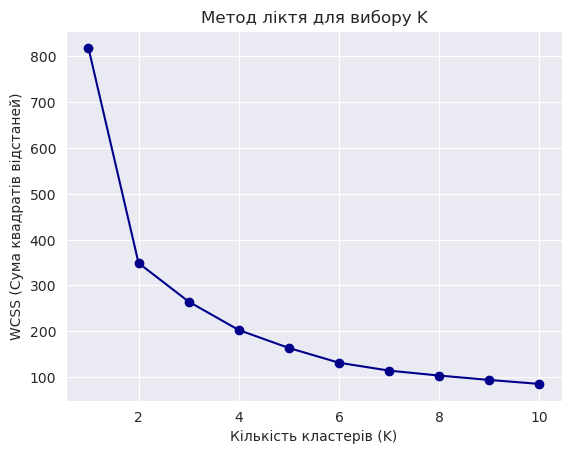

In [19]:
# Масив для збереження WCSS - Within-Cluster Sum of Squares
wcss = []  # сума квадратів відстаней всередині кластерів

# Тестуємо значення K від 1 до 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_2d)
    wcss.append(kmeans.inertia_)

# Будуємо графік
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='darkblue')
plt.xlabel('Кількість кластерів (K)')
plt.ylabel('WCSS (Сума квадратів відстаней)')
plt.title('Метод ліктя для вибору K')
plt.show()

# Застосування методу сілуетів

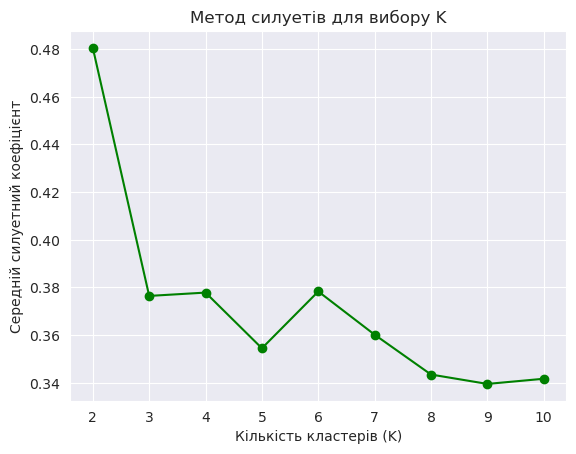

In [20]:
from sklearn.metrics import silhouette_score

# Масив для збереження силуетних коефіцієнтів
silhouette_scores = []

# Тестуємо значення K від 2 до 10 (для силуету потрібно принаймні 2 кластери)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_2d.values)
    score = silhouette_score(data_2d.values, labels)
    silhouette_scores.append(score)

# Побудова графіку
plt.plot(range(2, 11), silhouette_scores, marker="o", linestyle="-", color="green")
plt.xlabel("Кількість кластерів (K)")
plt.ylabel("Середній силуетний коефіцієнт")
plt.title("Метод силуетів для вибору K")
plt.show()

Отже як можна побачити з графіку ліктьового методу та методу сілуетів оптимальна кількість кластерів дорівнює k=2. Проведемо кластеризацію та додамо до нашого датасету стовпець Cluster, що містить мітки кластерів:

In [21]:
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(data_2d)

data_2d['Cluster'] = kmeans.labels_
data_2d

,1,2,Cluster
0,-0.768716,0.460860,1
1,2.687848,2.366961,0
2,-0.201379,0.470430,1
3,0.608496,1.225400,1
4,-0.082282,1.137218,1
...,...,...,...
195,0.629144,4.378584,0
196,-0.723824,5.361801,0
197,1.346107,2.333476,1
198,3.608219,3.411546,0


---
# Візуалізація кластерів
---

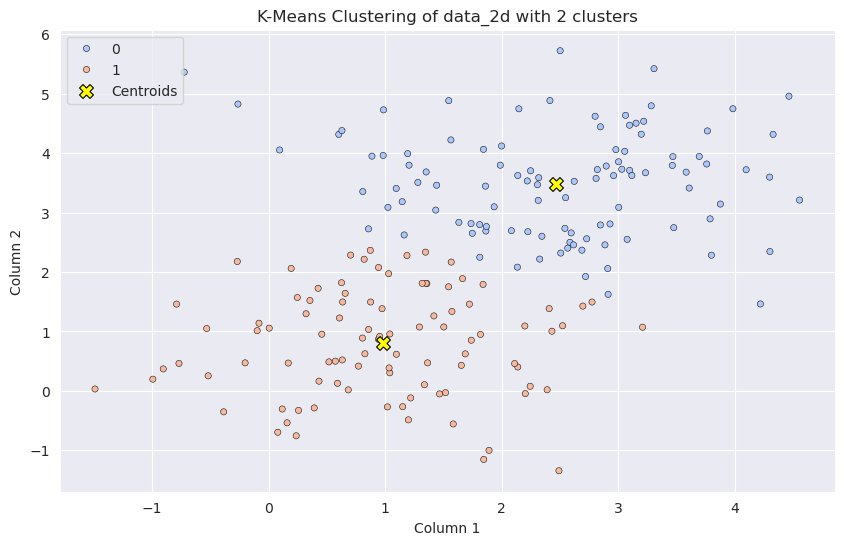

In [22]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Візуалізація кластерів
sns.scatterplot(data=data_2d, x=data_2d.columns[0], y=data_2d.columns[1],
                hue="Cluster", palette="coolwarm", s=20, edgecolor="k")

# Додаємо центроїди
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
                color="yellow", marker="X", s=100, edgecolor="k", label="Centroids")

# Використовуємо назви перших двох стовпців для підписів осей
plt.xlabel(f'Column {data_2d.columns[0]}')
plt.ylabel(f'Column {data_2d.columns[1]}')

plt.title(f'K-Means Clustering of data_2d with {kmeans.n_clusters} clusters')
plt.legend()
plt.show()

---
# Алгоритм K-means для датасету mnist
---

In [25]:
mnist = pd.read_csv(data_url+'/mnist.csv', header=None)
mnist.shape

(500, 785)

In [26]:
# Відокремлення міток від ознак
X = mnist.iloc[:, 1:].values  # Всі колонки, окрім першої (мітка)
y = mnist.iloc[:, 0].values   # Перша колонка - мітка класу

# Зменшення розмірності до 2D за допомогою PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(500, 2)

In [27]:
print(type(X_pca))

<class 'numpy.ndarray'>


In [ ]:
# inertia = []
# k_range = range(1, 11)

# for k in k_range:
#     mnist_kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     mnist_kmeans.fit(X_pca)
#     inertia.append(mnist_kmeans.inertia_)

In [31]:

# # Будуємо графік
# plt.plot(k_range, inertia, marker='o', linestyle='-', color='darkblue')
# plt.xlabel('Кількість кластерів (K)')
# plt.ylabel('Inertia (Сума квадратів відстаней)')
# plt.title('Метод ліктя для вибору K')
# plt.show()

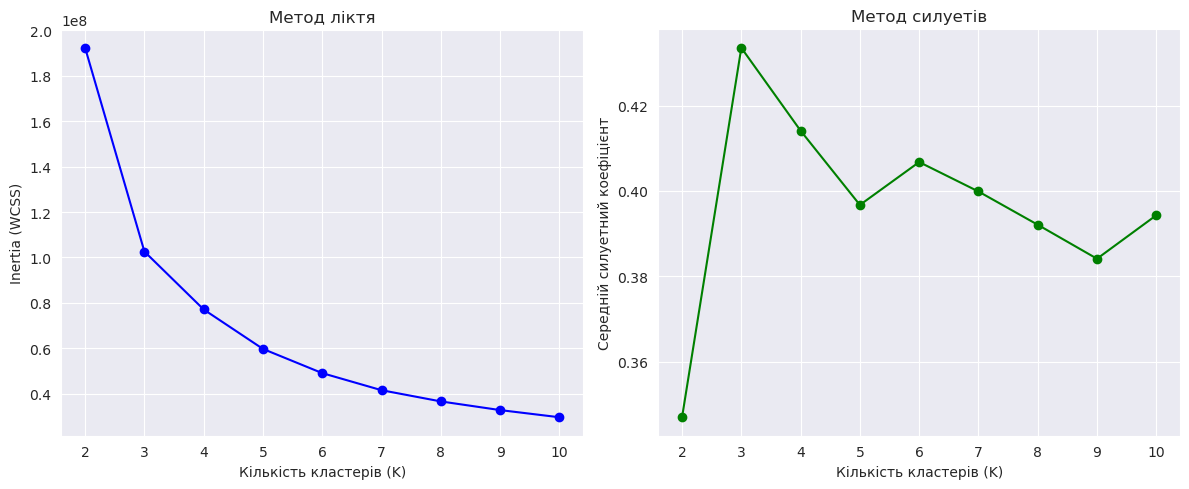

In [30]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # для силуета потрібно від 2 кластерів

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

# Візуалізація обох методів
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Метод ліктя
axs[0].plot(k_range, inertia, marker="o", color="blue")
axs[0].set_title("Метод ліктя")
axs[0].set_xlabel("Кількість кластерів (K)")
axs[0].set_ylabel("Inertia (WCSS)")

# Метод силуетів
axs[1].plot(k_range, silhouette_scores, marker="o", color="green")
axs[1].set_title("Метод силуетів")
axs[1].set_xlabel("Кількість кластерів (K)")
axs[1].set_ylabel("Середній силуетний коефіцієнт")

plt.tight_layout()
plt.show()

In [32]:
# Виконання кластеризації KMeans
mnist_kmeans = KMeans(n_clusters=3, random_state=42)
clusters = mnist_kmeans.fit_predict(X_pca)

X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

X_pca['Clusters'] = clusters

In [33]:
X_pca.shape

(500, 3)

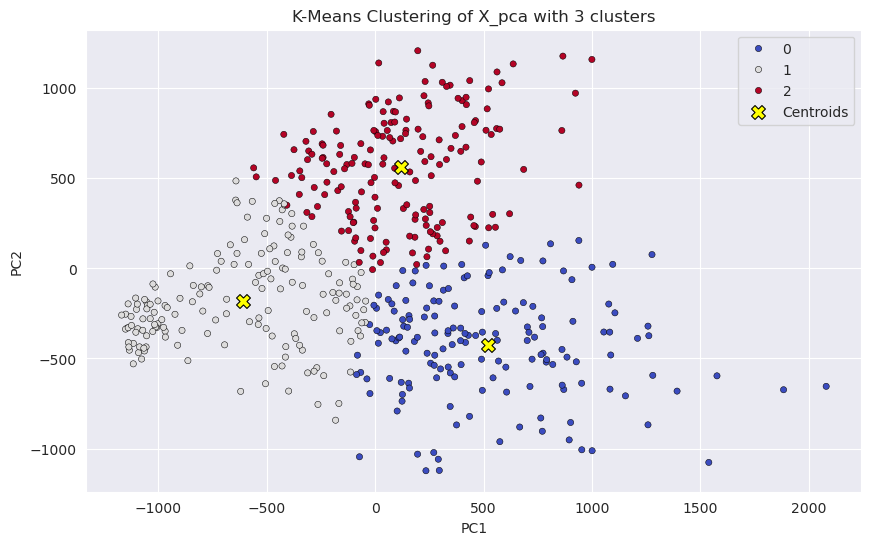

In [34]:

# Візуалізація кластерів
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

sns.scatterplot(data=X_pca, x='PC1', y='PC2', hue="Clusters", palette="coolwarm", s=20, edgecolor="k")

# Додаємо центроїди
sns.scatterplot(x=mnist_kmeans.cluster_centers_[:, 0], y=mnist_kmeans.cluster_centers_[:, 1],
                color="yellow", marker="X", s=100, edgecolor="k", label="Centroids")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'K-Means Clustering of X_pca with {mnist_kmeans.n_clusters} clusters')
plt.legend()
plt.show()

---
# Висновки
---
Візуалізація результатів алгоритму кластеризації K-means демонструє коректне застосування алгоритму. Завдяки ліктьовому методу була визначена оптимальна кількість кластерів для кожного дата-сету.
Це значення також підтверджується методом силуетів, який показав найвищий середній силуетний коефіцієнт саме для цієї кількості кластерів.
Таким чином, обидва методи узгоджено вказують на найкраще значення параметра K, що свідчить про якісну кластеризацію даних.

---
# Extra - Isolation Forest
---

In [35]:
# === Додаємо Isolation Forest ===
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
X_pca["Anomaly_Score"] = iso_forest.fit_predict(X_pca[["PC1", "PC2"]])

# Позначення аномалій (-1 = аномалія, 1 = нормальні точки)
X_pca["Anomaly"] = X_pca["Anomaly_Score"].apply(lambda x: "Anomaly" if x == -1 else "Norm")




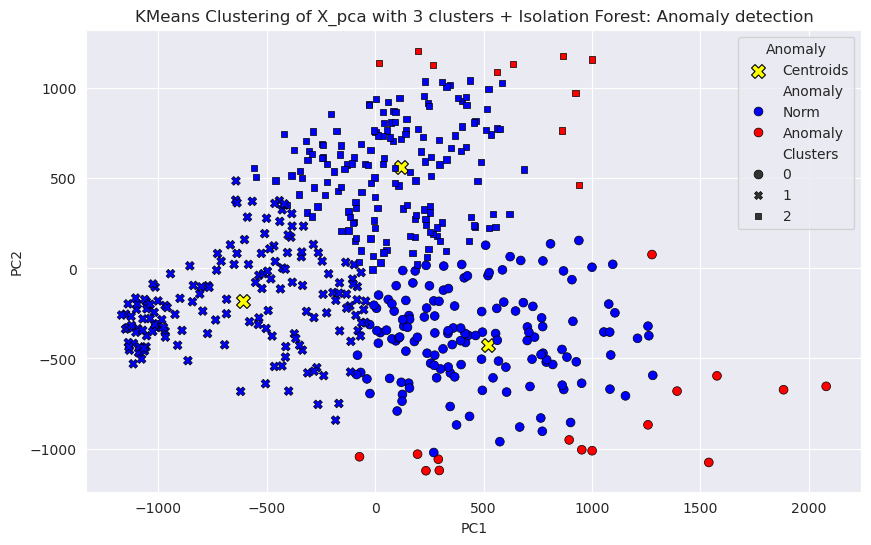

In [36]:
# Візуалізація кластерів
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

sns.scatterplot(x=mnist_kmeans.cluster_centers_[:, 0], y=mnist_kmeans.cluster_centers_[:, 1],
                color="yellow", marker="X", s=100, edgecolor="k", label="Centroids")

sns.scatterplot(data=X_pca, x="PC1", y="PC2", hue="Anomaly", style="Clusters",
                palette={"Norm": "blue", "Anomaly": "red"}, s=40, edgecolor="k")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f"KMeans Clustering of X_pca with {mnist_kmeans.n_clusters} clusters + Isolation Forest: Anomaly detection")
plt.legend(title="Anomaly")
plt.show()

---
# Extra - EllipticEnvelope
---

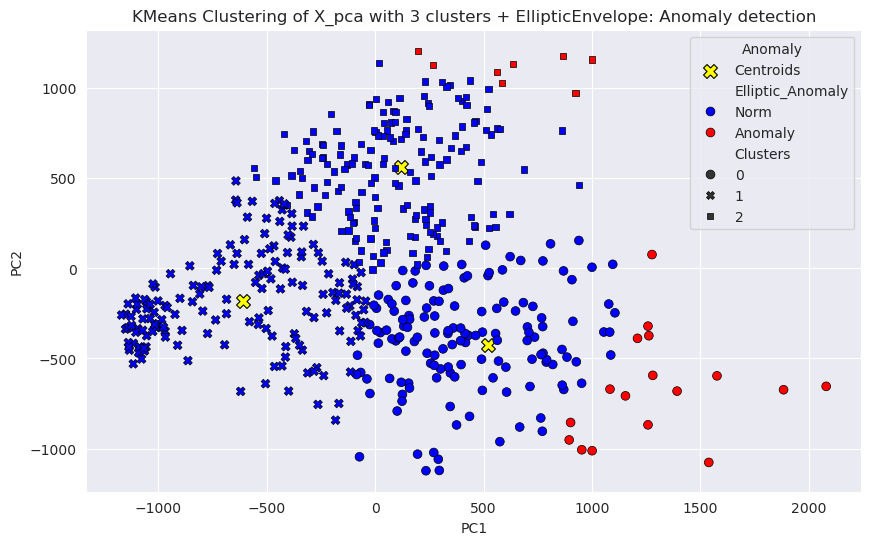

In [37]:

# === Додаємо EllipticEnvelope ===
elliptic_env = EllipticEnvelope(contamination=0.05, random_state=42)
X_pca["Elliptic_Anomaly_Score"] = elliptic_env.fit_predict(X_pca[["PC1", "PC2"]])

# Позначення аномалій
X_pca["Elliptic_Anomaly"] = X_pca["Elliptic_Anomaly_Score"].apply(lambda x: "Anomaly" if x == -1 else "Norm")

# Візуалізація кластерів з EllipticEnvelope
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

sns.scatterplot(x=mnist_kmeans.cluster_centers_[:, 0], y=mnist_kmeans.cluster_centers_[:, 1],
                color="yellow", marker="X", s=100, edgecolor="k", label="Centroids")

sns.scatterplot(data=X_pca, x="PC1", y="PC2", hue="Elliptic_Anomaly",  style="Clusters",
                palette={"Norm": "blue", "Anomaly": "red"}, s=40, edgecolor="k")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f"KMeans Clustering of X_pca with {mnist_kmeans.n_clusters} clusters + EllipticEnvelope: Anomaly detection")
plt.legend(title="Anomaly")
plt.show()

---
# Extra - LocalOutlierFactor
---

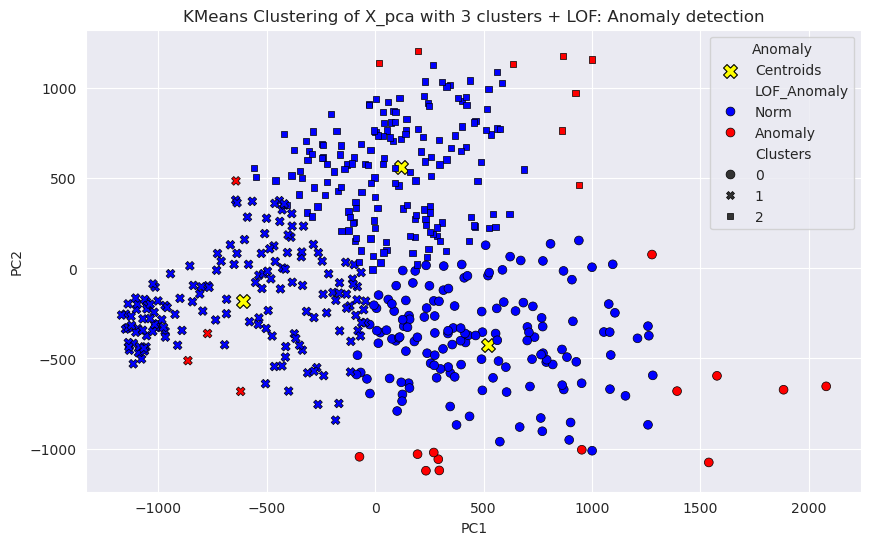

In [38]:
# === Додаємо Local Outlier Factor (LOF) ===
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
X_pca["LOF_Anomaly_Score"] = lof.fit_predict(X_pca[["PC1", "PC2"]])

# Позначення аномалій
X_pca["LOF_Anomaly"] = X_pca["LOF_Anomaly_Score"].apply(lambda x: "Anomaly" if x == -1 else "Norm")

# Візуалізація кластерів з LOF
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

sns.scatterplot(x=mnist_kmeans.cluster_centers_[:, 0], y=mnist_kmeans.cluster_centers_[:, 1],
                color="yellow", marker="X", s=100, edgecolor="k", label="Centroids")

sns.scatterplot(data=X_pca, x="PC1", y="PC2", hue="LOF_Anomaly",  style="Clusters",
                palette={"Norm": "blue", "Anomaly": "red"}, s=40, edgecolor="k")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f"KMeans Clustering of X_pca with {mnist_kmeans.n_clusters} clusters + LOF: Anomaly detection")
plt.legend(title="Anomaly")
plt.show()
